### Importacion de dependencias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

IMPORTAMOS PCA de scikit learn

In [24]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import IncrementalPCA

Importamos el modelo de regresión logistica

In [4]:
from sklearn.linear_model import LogisticRegression

Importamos tambien un escalador para normalizar nuestros datos para que esten entre 0 y 1

In [5]:
from sklearn.preprocessing import StandardScaler

importamos tambien train_test_split par adividir nuestros datos de train y test

In [6]:
from sklearn.model_selection import train_test_split

### Importamos el csv

In [7]:
df = pd.read_csv("./data/heart.csv")

Y = df["target"]
df = df.drop("target", axis=1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


Normalizar los datos con StandardScaler

In [8]:
df_features = StandardScaler().fit_transform(df)

### Divimos el datasets en train y test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df_features, Y, test_size=0.3, random_state=42)

### APLICAMOS EL ALGORITMO PCA

In [30]:
### APLICAMOS EL ALGORITMO PCA

pca = PCA(n_components=3)
pca.fit(X_train)

### Aplicar funcion de KErnel PCA

kpca = KernelPCA(n_components=3, kernel="linear")
kpca.fit(X_train)
df_train_kpca = kpca.transform(X_train)
df_test_kpca = kpca.transform( X_test)


### aplicamos para verificar la diferencia, incremental pca
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

,n_components,3
,whiten,False
,copy,True
,batch_size,10


### graficar PCA y IPCA

Cuando aplicás un Análisis de Componentes Principales (PCA) con sklearn.decomposition.PCA, este transforma tus datos en nuevas dimensiones llamadas componentes principales. Cada componente principal captura una cierta proporción de la varianza total del dataset original.

* pca.explained_variance_ratio_ te da un array donde cada valor representa la proporción de varianza explicada por cada componente principal.

* pca.explained_variance_ (con "_") te da la varianza absoluta de cada componente (no la proporción).

¿Qué hace range(len(pca.explained_variance_))?
Esto genera una secuencia de números enteros desde 0 hasta el número de componentes principales menos uno. Es decir, está generando un eje X con los índices de los componentes principales (por ejemplo, [0, 1, 2, ..., n-1]).

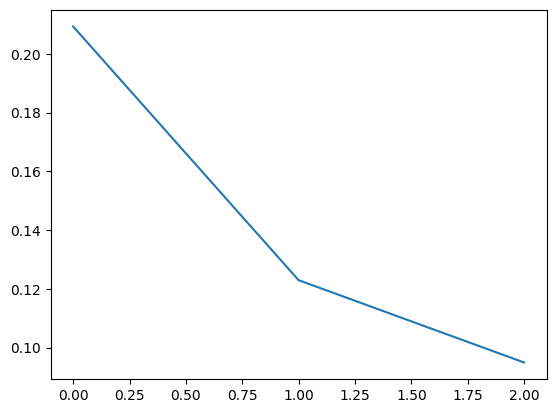

In [11]:
# utilizamos range junto con la funcion len sobre pca.explainer_variance para graficar
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)

plt.show()
#Esta grafica muestra la varianza de cada columna 



### Crear modelo de regresion logistica

In [ ]:
logictic = LogisticRegression( solver="lbfgs")

Df_train = ipca.transform(X_train)
Df_test = ipca.transform(X_test)

In [27]:
logictic.fit(df_train_kpca, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Utilizamos el metodo score() del modelo de regresion logistica

In [31]:
print("SCORE", logictic.score(df_test_kpca, Y_test)*100, "%")

SCORE 79.22077922077922 %
